<center><img src='./img/mobile_phone_ai.jpg' alt='Heart Disease Rates 2018-2020' height='300'/></center>

# Mobile Phone Price Analysis

## Introduction

Imagine that you work in the marketing department of a major mobile phone company. In recent months, your team has collected extensive data on various phone models, focusing on sales prices as the primary variable of analysis. The general objective of this study is to establish reasonable pricing for future mobile phone models, taking into account market conditions and variables such as RAM size, internal storage capacity, screen resolution, and more.

In the following sections, we will explore a series of questions designed to guide the development of this study using various Machine Learning techniques.

## Dataset

The dataset we will use for this exercise, given its educational purpose, is sourced from [Kaggle](https://www.kaggle.com/), an open-access platform that offers numerous resources for advancing knowledge in Data Science and Machine Learning.

Kaggle enables various sponsors (including companies like Facebook and leading research institutions) to host competitions aimed at solving real-world problems, often with substantial monetary rewards. However, one of Kaggle's most valuable features is its extensive repository of resources. These include code examples in Python, R, or Julia, as well as real-world datasets that allow practitioners to apply various Machine Learning techniques. Many datasets come with supplementary files providing detailed descriptions of their features.


## Load data

The required libraries will be imported as needed throughout the project to maintain clarity and ensure that each section contains only the relevant tools for its specific tasks. This approach promotes modularity and keeps the code organized.

In [1]:
import pandas as pd

# Load the file and inspect its attributes
df = pd.read_csv('../data/mobile_phone.csv', sep=',')

display(df.info())
print('The first 5 rows are:\n')

display(df.head())
print('The features are:\n', list(df.keys()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

None

The first 5 rows are:



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price
0,1954,0,5,1,0,0,24,8,187,4,...,1149,700,16,3,5,1,1,1,0,27
1,1445,1,5,0,0,0,53,7,174,7,...,836,1099,17,1,20,1,0,0,0,28
2,509,1,6,1,2,1,9,1,93,5,...,1224,513,19,10,12,1,0,0,0,25
3,1866,0,5,0,13,1,52,7,185,1,...,563,373,14,9,3,1,0,1,0,25
4,775,0,10,0,3,0,46,7,159,2,...,1864,568,17,15,11,1,1,1,0,32


The features are:
 ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'price']


## Correlation analysis of price_range
To begin the analysis, we focus on the price_range variable, which categorizes phones into four price tiers:

0. Low cost
1. Medium cost
2. High cost
3. Very high cost (e.g., luxury phones).

We computed a correlation matrix to examine the relationships between all variables, particularly focusing on their correlation with price_range. Although the matrix size is quite large and could have been analyzed in subsets, the five variables with the highest correlations to price_range were clearly identifiable.


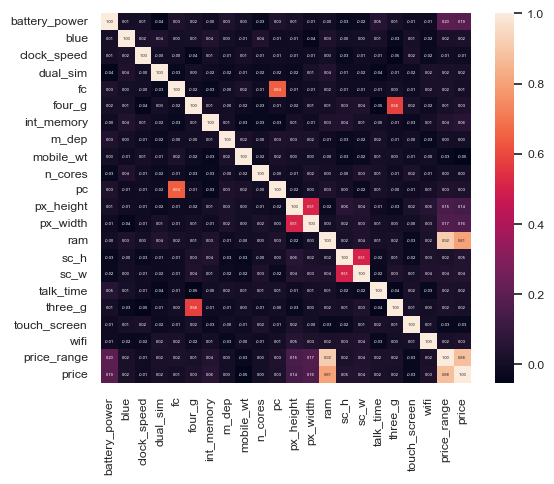

In [2]:
import numpy as np
import seaborn as sns

# format
sns.set_theme(font_scale=0.8)

# Heatmap of correlations
correlation_matrix = np.corrcoef(df.values.T)
heatmap = sns.heatmap(
    correlation_matrix,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 3},
    yticklabels=df.columns,
    xticklabels=df.columns
)

Top 5 variables most correlated with price_range: ram, price, battery_power, px_width, and px_height.

These variables are sorted by their correlation strength, indicating their significance in predicting the price range of a mobile phone. A heatmap of the correlation matrix was also generated for visual inspection of these relationships.

## Focus on price and its most correlated variables

Since price (in euros of each phone) is a continuous variable and more relevant to our study than price_range, we will visualize the correlation matrix focusing on the two variables most correlated with price: ram and battery_power. The matrix will also include the price variable itself for comparison.

This step provides a clearer understanding of the relationships between these key features and the phone's price.

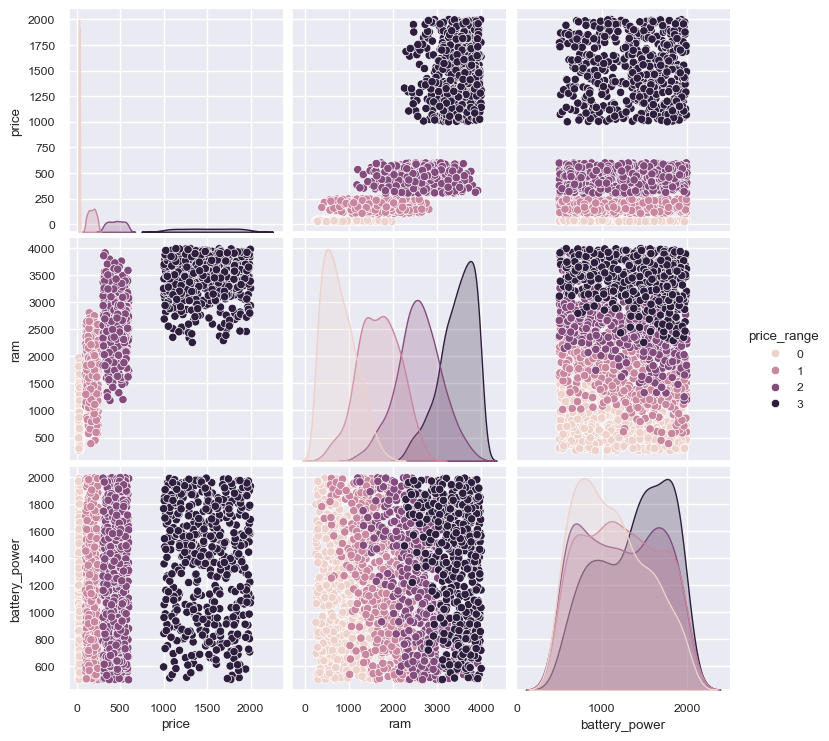

In [3]:
# Determine correlations of `price` with `ram` and `battery_power`
sns.pairplot(
    df[['price_range', 'price', 'ram', 'battery_power']],
    hue='price_range',
    diag_kind='auto'
)


##  Linear Regression of price vs. ram

We will perform a linear regression to analyze the relationship between the price and ram variables, generate a graphical representation of the regression line and calculate the regression coefficients and the coefficient of determination (R²).


Coefficient w1 (slope): 0.4427509361752522
Coefficient w0 (intercept): -396.04419171216216


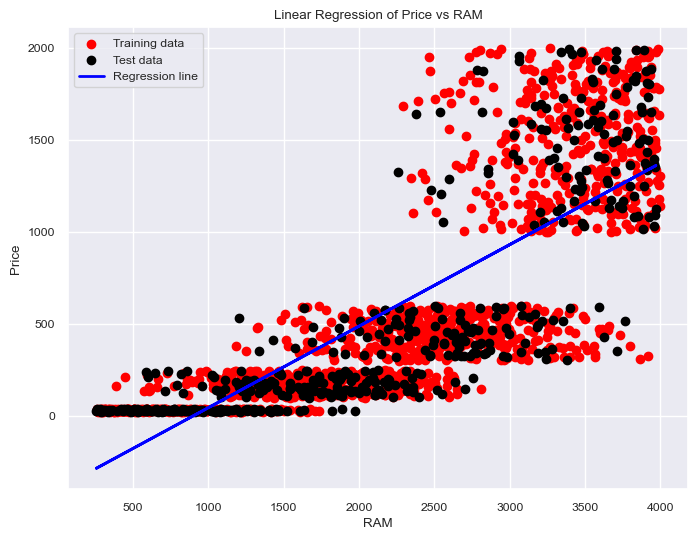

R-squared value on training set: 0.644
R-squared value on test set: 0.663


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Preparing data for regression
ram = np.array(df['ram']).reshape(-1, 1)
price = np.array(df['price'])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ram, price, random_state=20)

# Training the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Regression coefficients
print('Coefficient w1 (slope):', linear_model.coef_[0])
print('Coefficient w0 (intercept):', linear_model.intercept_)

# Plotting the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.scatter(X_test, y_test, color='black', label='Test data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Regression line')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('Linear Regression of Price vs RAM')
plt.legend()
plt.show()

# R-squared values for evaluation
print('R-squared value on training set:', round(linear_model.score(X_train, y_train), 3))
print('R-squared value on test set:', round(linear_model.score(X_test, y_test), 3))

Analysis:

>The R² value is low, indicating that the data points are not closely aligned with the regression line. While this alone may not be a negative factor, the graph and the spread of the data points suggest that the linear model is not ideal for this relationship. A polynomial regression might yield a better fit.

## Price prediction

To determine the price of a phone with 3100 MB of RAM based on the trained linear regression model, we could simply use the equation of the regression line:

$$
\text{price} = w_0 + w_1 \cdot \text{ram}
$$

Where:
- \( w_0 \) is the intercept of the model (bias term).
- \( w_1 \) is the coefficient (slope) associated with the RAM feature.


In [5]:
# Estimate price for a phone with 3100 MB RAM
ram_value = 3100
estimated_price = linear_model.coef_[0] * ram_value + linear_model.intercept_
print(f'Estimated price for a phone with {ram_value} MB RAM: {estimated_price:.2f} €.')

Estimated price for a phone with 3100 MB RAM: 976.48 €.


Or we could simply **obtain a prediction from the model**.

In [6]:
# Price for a phone with 3100 MB RAM
ram_value = 3100
y_pred = linear_model.predict([[ram_value]])
print('The predicted price would be:', round(y_pred[0], 2), '€.')


The predicted price would be: 976.48 €.


## Residual Plot

We will graphically plot the residuals against the predicted values based on the linear regression model generated (mobile prices range approximately between 20 and 2000 €).

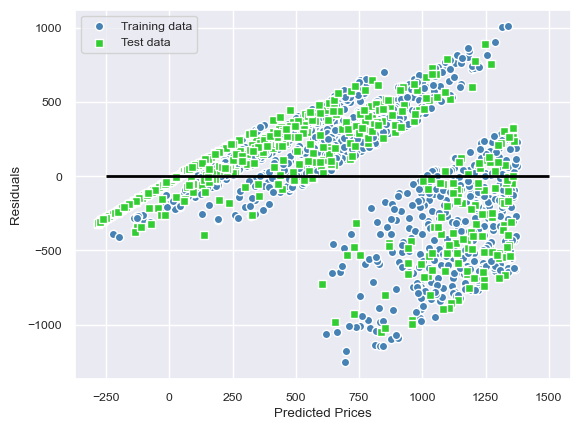

In [7]:
# Residuals vs Predicted values
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o',
            edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s',
            edgecolor='white', label='Test data')

plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

plt.hlines(y=0, xmin=-250, xmax=1500, color='black', lw=2)


## Classification Using 'ram' and 'battery_power' with 'price_range' as the Classification Label

In this section, we will focus on the variables 'ram' and 'battery_power', considering 'price_range' as the classification label. We will perform classification on the dataset using a linear kernel. Additionally, we will incorporate the plot_decision_regions function to enhance the graphical output. Finally, we will evaluate the model's performance by determining the test accuracy.

Note: Load the 'price_range' data using the instruction price_range=np.array(data['price_range']) to avoid any issues with array dimensions (and transpose it afterward).

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test accuracy is: 83.0%.


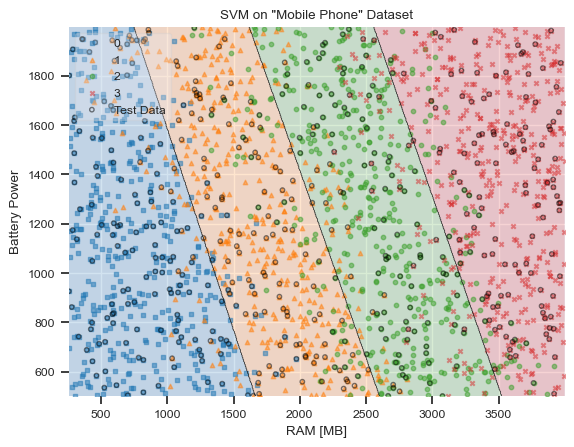

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the dataset again
df = pd.read_csv('../data/mobile_phone.csv', sep=',')

# Prepare the features and target
X = df[['ram', 'battery_power']]
y = df['price_range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

# Perform classification on the dataset using SVC with a linear kernel
clf = SVC(kernel='linear', random_state=1, C=1)
clf.fit(X_train, y_train)

# Combine training and test data for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Plotting attributes for improved graphical output
scatter_kwargs = {'s': 10, 'edgecolor': None, 'alpha': 0.5}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 10, 'label': 'Test Data',
                            'alpha': 0.5}

# Plot decision regions
plot_decision_regions(X_combined, y_combined, clf, legend=2,
                      X_highlight=np.array(X_test), scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.xlabel('RAM [MB]')
plt.ylabel('Battery Power')
plt.title('SVM on "Mobile Phone" Dataset')

# Predict and calculate accuracy
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions, normalize=True)
accuracy = round(accuracy, 2)

# Print accuracy
print(f'Test accuracy is: {100 * accuracy}%.')

## Gaussian Radial Basis Function (RBF) Kernel with Gamma = 20

In this section, we will apply a classification using the Radial Basis Function (RBF) kernel with gamma = 20 to the dataset. This can be done by simply modifying the SVC model to use the RBF kernel instead of the linear one. Let's see the results:

c:\Users\Lander\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test accuracy is: 22.0%.


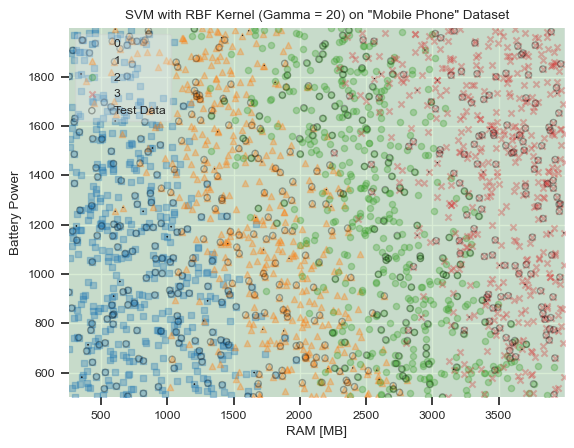

In [9]:
# SVC with RBF kernel and gamma=20
clf = SVC(kernel='rbf', random_state=1, gamma=20, C=1)
clf.fit(X_train, y_train)

# Plotting attributes for improved graphical output
scatter_kwargs = {'s': 20, 'edgecolor': None, 'alpha': 0.3}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 20, 'label': 'Test Data', 'alpha': 0.3}

# Plot decision regions
plot_decision_regions(X_combined, y_combined, clf, legend=2,
                      X_highlight=np.array(X_test), scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

plt.xlabel('RAM [MB]')
plt.ylabel('Battery Power')
plt.title('SVM with RBF Kernel (Gamma = 20) on "Mobile Phone" Dataset')

# Predict and calculate accuracy
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions, normalize=True)
accuracy = round(accuracy, 2)

# Print accuracy
print(f'Test accuracy is: {100 * accuracy}%.')

## K-Means Clustering without Labels and Comparison of Results for Different Cluster Numbers

In this section, we will apply the K-Means clustering algorithm to the dataset, using the variables 'price' and 'ram' to find possible groupings (clusters) of the data. The goal is to identify the number of clusters we should propose and then compare the results when using one additional cluster. We will visualize the results through graphs for both cases.

The steps include:

1. Finding the best number of clusters using the inertia (sum of squared distances to the nearest centroid) and the silhouette score.
2. Performing K-Means clustering for k = 3 and k = 4 clusters and visualizing the results.

The clusters each instance belongs to: [1 1 1 ... 2 2 2]
The centroids are at: [[ 435.32226563 2665.1484375 ]
 [  51.72821577  699.35892116]
 [1507.0617284  3481.28395062]
 [ 193.76923077 1643.99038462]]


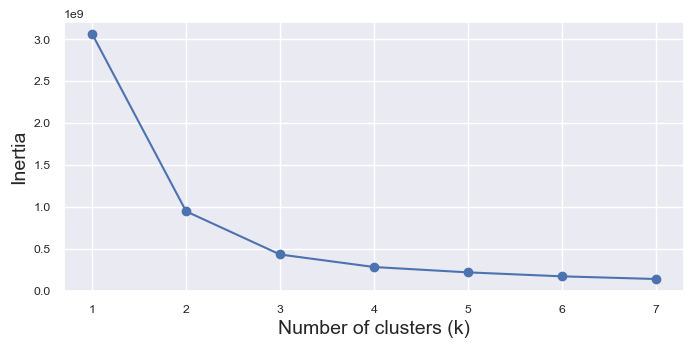

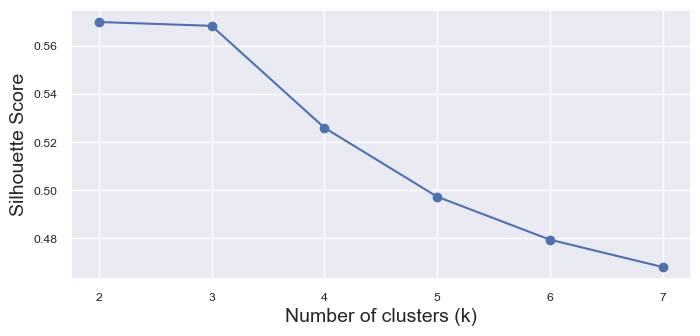

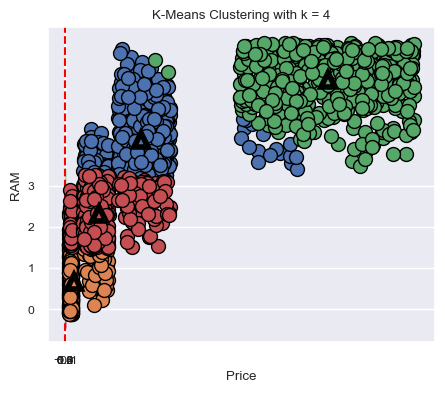

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from matplotlib.ticker import FixedFormatter, FixedLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the dataset
df = pd.read_csv('../data/mobile_phone.csv', sep=',')
X = np.array(df[['price','ram']])

# Create KMeans models for different k values (1 to 7)
kmeans_por_k = [KMeans(n_clusters=k, random_state=20).fit(X) for k in range(1, 8)]

# Calculate inertias and silhouette scores
inertias = [model.inertia_ for model in kmeans_por_k]
siluetas = [silhouette_score(X, model.labels_) for model in kmeans_por_k[1:]]

# Plot the inertia graph
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 8), inertias, 'bo-')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

# Plot the silhouette score graph
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 8), siluetas, 'bo-')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)

# As per the graph, we initially look for k = 3 based on inertia and silhouette score.
# But let's also try k = 4 as requested.

# Set k = 4
k = 4

# Plot silhouette coefficients for k = 4
plt.figure(figsize=(11, 9))
plt.subplot(2, 2, k-1)
y_pred = kmeans_por_k[k - 1].labels_
silhouette_coefficients = silhouette_samples(X, y_pred)
padding = len(X) // 30
pos = padding
ticks = []
for i in range(k):
    coeffs = silhouette_coefficients[y_pred == i]
    coeffs.sort()
    color = mpl.cm.Spectral(i / k)
    plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ticks.append(pos + len(coeffs) // 2)
    pos += len(coeffs) + padding
plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
if k in (2, 4):
    plt.ylabel('Cluster')  
if k in (4, 5):
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('Silhouette Coefficient')
else:
    plt.tick_params(labelbottom=False)
plt.axvline(x=siluetas[k - 2], color='red', linestyle='--')
plt.title(f'Silhouette Coefficient for k = {k}', fontsize=16)

# Perform K-Means for k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Display the cluster assignments and centroids
print('The clusters each instance belongs to:', kmeans.labels_)
print('The centroids are at:', kmeans.cluster_centers_)

# Plot the results
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1], [0, 1, 2, 3], markers='^', markeredgewidth=4)
plt.title('K-Means Clustering with k = 4')
plt.xlabel('Price')
plt.ylabel('RAM')
plt.show()

##  Clustering with DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

The DBSCAN algorithm groups together points that are closely packed, marking points in low-density regions as outliers (noise). For DBSCAN, the key parameters are:

- eps (epsilon): The maximum distance between two samples for them to be considered as in the same neighborhood.
- min_samples: The number of samples in a neighborhood for a point to be considered as a core point.

Before applying DBSCAN, it is often helpful to scale the data since DBSCAN is sensitive to the magnitude of the features. This ensures that both the price and ram features have comparable ranges.

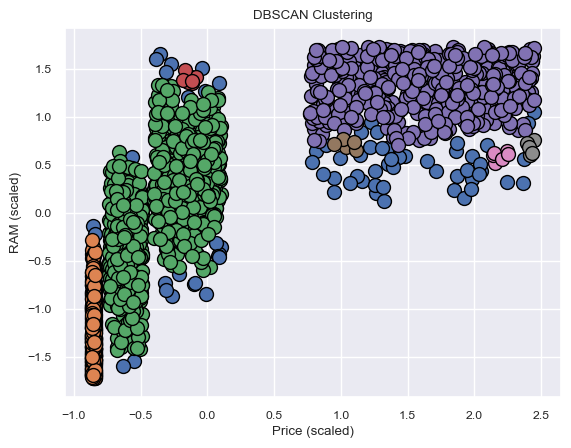

DBSCAN Labels: [0 0 0 ... 3 3 3]


In [11]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('../data/mobile_phone.csv', sep=',')
X = np.array(df[['price', 'ram']])

# Pre-scale the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Apply DBSCAN with epsilon (eps) set to 0.1
dbscan = DBSCAN(eps=0.1, min_samples=5)  # You can adjust 'min_samples' as needed
dbscan.fit(X_scaled)

# Plot the DBSCAN results
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], dbscan.labels_, markers="o")
plt.title('DBSCAN Clustering')
plt.xlabel('Price (scaled)')
plt.ylabel('RAM (scaled)')
plt.show()

# Print the labels assigned by DBSCAN
print('DBSCAN Labels:', dbscan.labels_)

## Agglomerative Clustering Algorithm

In this section, we will apply the Agglomerative Clustering algorithm to the dataset. Agglomerative Clustering is a type of hierarchical clustering that builds the hierarchy bottom up, starting by treating each data point as a separate cluster and merging the closest clusters iteratively until the desired number of clusters is reached.

We will follow these steps:

1. Preprocess the data: Load the dataset and select the relevant features for clustering (price and ram).
2. Apply Agglomerative Clustering: Use AgglomerativeClustering from scikit-learn to perform the clustering and set the desired number of clusters (n_clusters).
3. Visualize the results: Visualize how the data points are grouped using a scatter plot with color coding for each cluster.

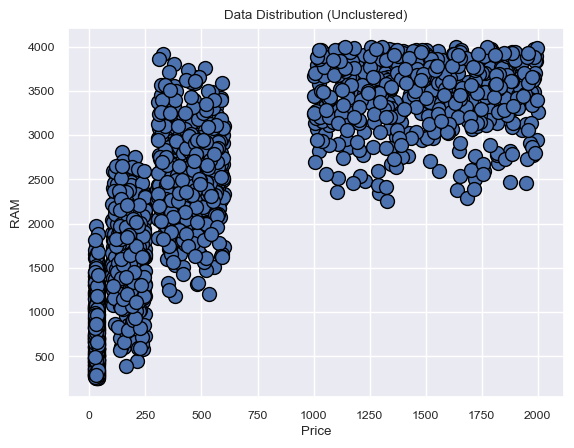

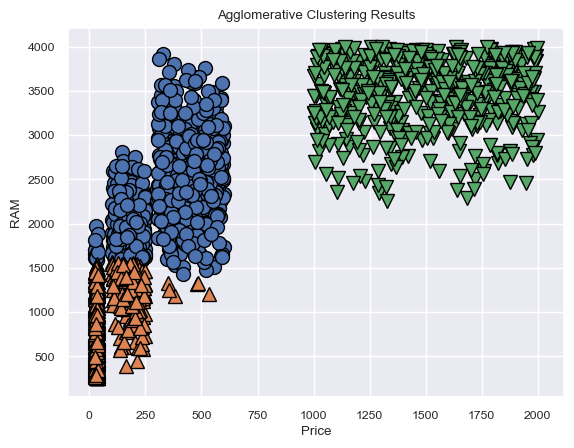

Cluster labels assigned by the algorithm: [1 1 1 ... 2 2 2]


In [12]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Load the data
df = pd.read_csv('../data/mobile_phone.csv', sep=',')
X = np.array(df[['price', 'ram']])

# Initial visualization of the data without clustering
mglearn.discrete_scatter(X[:, 0], X[:, 1])
plt.title('Data Distribution (Unclustered)')
plt.xlabel('Price')
plt.ylabel('RAM')
plt.show()

# Apply the Agglomerative Clustering algorithm
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

# Visualize the results of the clustering
mglearn.discrete_scatter(X[:, 0], X[:, 1], agg.labels_)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Price')
plt.ylabel('RAM')
plt.show()

# Print the cluster labels
print('Cluster labels assigned by the algorithm:', agg.labels_)


## Applying PCA Algorithm and Explaining Variance

In this section, we will apply the Principal Component Analysis (PCA) algorithm to the entire dataset. PCA is a dimensionality reduction technique that transforms the original features into new ones, called principal components (PCs), which are linear combinations of the original features. These principal components capture the variance of the data, and we can use them to reduce the number of features while retaining most of the variance in the data.

Here are the steps:

1. Preprocess the Data: We will scale the features using StandardScaler to ensure that all features contribute equally to the PCA, as the features have very different variances.
2. Apply PCA: We will apply PCA to the scaled data and calculate the explained variance for each principal component.
3. Visualize the Results: We will plot the cumulative explained variance as a function of the number of dimensions.
4. Determine the Number of Dimensions for 95% Variance: We will check how many dimensions are needed to preserve around 95% of the variance.


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price
0,1954,0,5,1,0,0,24,8,187,4,...,1149,700,16,3,5,1,1,1,0,27
1,1445,1,5,0,0,0,53,7,174,7,...,836,1099,17,1,20,1,0,0,0,28
2,509,1,6,1,2,1,9,1,93,5,...,1224,513,19,10,12,1,0,0,0,25
3,1866,0,5,0,13,1,52,7,185,1,...,563,373,14,9,3,1,0,1,0,25
4,775,0,10,0,3,0,46,7,159,2,...,1864,568,17,15,11,1,1,1,0,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

None

Variance of each dimension:
battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e+01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e+00
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
price            3.548895e+05
dtype: float64


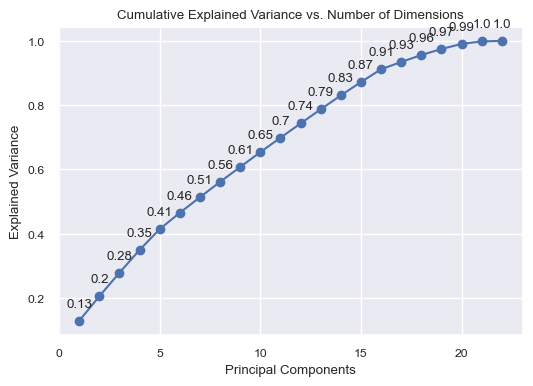

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('../data/mobile_phone.csv', sep=',')
display(df.head())

# Get information about the data
display(df.info())
print('Variance of each dimension:')
print(df.var(axis=0))

# Apply PCA using a pipeline with StandardScaler and PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Get the PCA model
pca_model = pca_pipe.named_steps['pca']

# Plot the explained variance
cumsum = np.cumsum(pca_model.explained_variance_ratio_)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(len(df.columns)) + 1, cumsum, marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
for x, y in zip(np.arange(len(df.columns)) + 1, cumsum):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords='offset points', xytext=(0, 10), ha='center')
plt.title('Cumulative Explained Variance vs. Number of Dimensions')
plt.show()

In [14]:
# Get the projections of the original data onto the principal components
projections = pca_pipe.transform(X=df)
projections = pd.DataFrame(projections, 
                           columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
                                    'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16',
                                    'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'], 
                           index=df.index)
display(projections.head())


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,-1.990878,-1.398781,-0.625233,-0.186994,0.305066,0.023230,-1.415810,-1.313717,0.120775,-0.104669,...,1.037635,1.142977,-0.796511,1.657097,-0.769277,-0.698455,1.214377,-0.449807,0.199812,-0.245514
1,-1.870406,0.274729,-0.319328,-0.507976,-0.713386,-2.338842,-0.255846,0.778476,-0.996732,-1.748780,...,-1.565596,-0.155449,-0.068887,0.452566,-1.357530,-0.714304,1.132652,1.128047,0.113141,-0.294963
2,-1.927052,-1.226709,1.500918,1.625449,-0.552527,1.074148,1.100740,0.417279,-0.741438,-1.413464,...,-0.295600,-0.454368,-0.454738,-1.052440,-0.864197,0.447540,-0.282902,0.980338,0.432514,0.138532
3,-2.058921,1.533577,2.687561,0.388916,-0.801000,-0.326081,-3.180739,0.277352,-0.437949,0.396204,...,-0.140453,1.091234,-1.029983,0.668241,0.049068,0.605981,-0.338371,-0.463324,0.436501,0.062684
4,-1.729406,-0.727288,0.621672,3.090555,-0.313394,-0.248188,-1.045627,-0.476573,-0.342455,0.605625,...,0.316467,-1.264381,-0.055804,-0.149699,1.089822,-0.338746,0.954680,1.080072,0.371827,-0.012617


We projected the original data onto the principal components and print the first few rows of the projections. These projections represent the data in a lower-dimensional space, making it easier to work with while retaining most of the variance.

Explained Variance Interpretation:

- The cumulative explained variance plot shows the total variance captured by the first n principal components. By looking at this plot, we can determine the minimum number of principal components needed to retain a certain percentage of the variance (e.g., 95%).

- Conclusion: Based on the plot, we can conclude that using around 17 dimensions (principal components) captures approximately 93% of the variance in the data. If we require 95% of the variance, we would need to select a slightly larger number of dimensions, possibly 18 or 19.

By applying PCA, we reduce the dimensionality of the dataset, which simplifies subsequent analyses, such as clustering, while preserving most of the important information.